## Linear Regression Model: <a href="https://rdrr.io/github/sunniraleigh/wetry/man/italian.html"><font color='#28b9fa'>Italian NYC Restaurants Dataset</font></a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
nyc = pd.read_table('nyc.txt')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


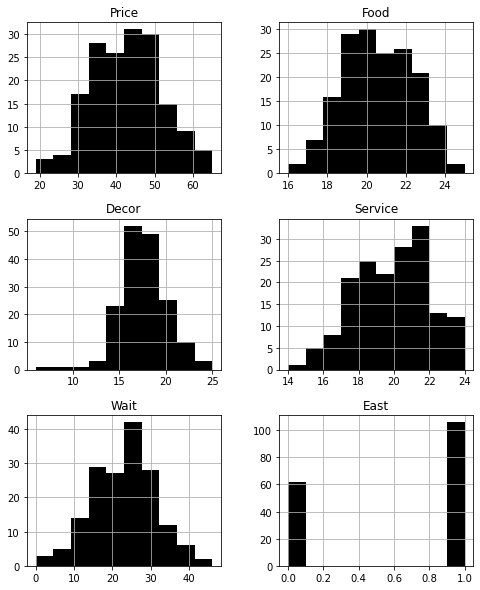

In [3]:
nyc.hist(figsize=(8,10), color ='k');

<font color='blue'>Creating 80/20 training and test set</font> 

In [4]:
X1 = nyc.iloc[:,1:].values
y1 = nyc.iloc[:,0].values
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.20, random_state=1)
print('Training Features Shape:', X_train_1.shape)
print('Test Features Shape:    ', X_test_1.shape)

Training Features Shape: (134, 5)
Test Features Shape:     (34, 5)


<font color='blue'>Creating linear regression model and displaying the intercepts and coefficients for the final model</font> 

In [5]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

print('Intercept:   ', nyc_mod.intercept_)
print('Coefficients:', nyc_mod.coef_)

Intercept:    -23.755435322488893
Coefficients: [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


<font color='blue'>Calculating the r-squared score for the training and testing set</font> 

In [6]:
train_r2 = nyc_mod.score(X_train_1, y_train_1)
test_r2 = nyc_mod.score(X_test_1, y_test_1)

print('Training r-Squared:', round(train_r2,4))
print('Testing r-Squared: ', round(test_r2,4))

Training r-Squared: 0.6306
Testing r-Squared:  0.6245


<font color='blue'>Generating price estimates based on the feature values in the test set</font> 

In [7]:
test_pred_1 = nyc_mod.predict(X_test_1)
print('Observed Prices: ', y_test_1[:10])
print('Estimated Prices:', np.round(test_pred_1[:10], 2))

Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


<font color='blue'>Creating a DataFrame using the above linear regression model to generate price estimations for three new restaurants</font>

In [8]:
nyc_new = pd.DataFrame([[22,12,20,15,0], [18,19,22,34,1], [25,22,18,36,0]],
                       columns = ['Food', 'Decor', 'Service', 'Wait', 'East'])
new_pred_1 = nyc_mod.predict(nyc_new)
print('Estimated Prices:', np.round(new_pred_1,2))

Estimated Prices: [30.87 42.57 58.06]
